In [2230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# importing data

In [2231]:
df = pd.read_csv("heart_disease_uci_modified.csv")

In [2232]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2.0
2,3.0,67.0,mALE,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0.0


In [2233]:
df.shape

(920, 13)

In [2234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        820 non-null    float64
 1   age       820 non-null    float64
 2   sex       820 non-null    object 
 3   dataset   820 non-null    object 
 4   cp        820 non-null    object 
 5   trestbps  787 non-null    object 
 6   chol      796 non-null    float64
 7   fbs       743 non-null    object 
 8   restecg   819 non-null    object 
 9   thalch    769 non-null    float64
 10  exang     769 non-null    object 
 11  oldpeak   762 non-null    float64
 12  num       820 non-null    float64
dtypes: float64(6), object(7)
memory usage: 93.6+ KB


In [2235]:
df.describe()

,id,age,chol,thalch,oldpeak,num
count,820.000000,820.000000,796.000000,769.000000,762.000000,820.000000
mean,466.103659,74.836585,199.536432,137.465540,0.880052,0.997561
std,265.182846,62.284158,110.870495,26.424601,1.089815,1.139798
min,1.000000,28.000000,0.000000,63.000000,-2.600000,0.000000
25%,237.750000,48.000000,175.000000,119.000000,0.000000,0.000000
50%,471.500000,56.000000,224.000000,140.000000,0.500000,1.000000
75%,698.250000,63.000000,268.250000,158.000000,1.500000,2.000000
max,920.000000,297.000000,603.000000,202.000000,6.200000,4.000000


In [2236]:
df.isna().sum()

id          100
age         100
sex         100
dataset     100
cp          100
trestbps    133
chol        124
fbs         177
restecg     101
thalch      151
exang       151
oldpeak     158
num         100
dtype: int64

In [2237]:
df.duplicated().sum()

np.int64(96)

In [2238]:
df.drop_duplicates(inplace=True)

In [2239]:
df.isna().sum()

id           4
age          4
sex          4
dataset      4
cp           4
trestbps    48
chol        28
fbs         81
restecg      5
thalch      55
exang       55
oldpeak     62
num          4
dtype: int64

In [2240]:
df.dropna(inplace=True)

In [2241]:
df.shape

(664, 13)

In [2242]:
df["sex"].unique()

array(['Male', 'mALE', 'Female', 'FeMALE'], dtype=object)

In [2243]:
df["sex"] = df["sex"].str.lower()

In [2244]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [2245]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [2246]:
df["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [2247]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [2248]:
df["restecg"] = df["restecg"].astype('category')
df["sex"] = df["sex"].astype('category')
df["dataset"] = df["dataset"].astype('category')
df["fbs"] = df["fbs"].astype('category')
df["cp"] = df["cp"].astype('category')
df["exang"] = df["exang"].astype('category')
df["age"] = df["age"].astype('int')

In [2249]:
df["restecg"] = df["restecg"].cat.codes
df["sex"] = df["sex"].cat.codes
df["dataset"] = df["dataset"].cat.codes
df["fbs"] = df["fbs"].cat.codes
df["exang"] = df["exang"].cat.codes
df["cp"] = df["cp"].cat.codes

In [2250]:
df['trestbps'].unique()

array(['145.0', '160.0', '120.0', '130.0', '140.0', '140.0/', '150.0',
       '110.0-', '150.0*', '132.0', '150.0-', '110.0', '117.0', '135.0',
       '130.0/', '112.0', '105.0', '120.0*', '124.0/', '125.0', '142.0',
       '128.0', '120.0/', '170.0', '155.0', '125.0-', '104.0', '138.0',
       '160.0/', '108.0', '134.0', '122.0-', '115.0', '118.0', '140.0*',
       '128.0/', '138.0-', '135.0/', '100.0', '200.0', '124.0-', '94.0',
       '122.0', '102.0*', '152.0', '125.0/', '101.0', '124.0', '126.0',
       '142.0-', '174.0', '148.0/', '178.0', '158.0-', '192.0', '129.0*',
       '138.0*', '180.0', '128.0*', '144.0', '120.0-', '112.0*', '123.0',
       '118.0-', '136.0', '130.0*', '110.0/', '146.0', '106.0', '156.0',
       '146.0*', '154.0', '148.0', '114.0', '130.0-', '132.0*', '164.0',
       '98.0', '190.0', '110.0*', '115.0/', '180.0/', '140.0-', '92.0',
       '118.0*', '160.0*', '136.0/', '135.0*', '160.0-', '145.0-',
       '155.0*', '105.0-', '125.0*', '185.0', '200.0-', '170

In [2251]:
def valide_number(string):
    number = ''
    for caracter in string:
        if '0'<= caracter <= '9' or caracter == '.':
            number += caracter
    return number

df['trestbps'] = df['trestbps'].agg(valide_number)
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

/var/folders/cc/x70s24gx40zg_y7gzcpvs4400000gn/T/ipykernel_1260/1795595499.py:8: FutureWarning: using <function valide_number at 0x17b96ea60> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['trestbps'] = df['trestbps'].agg(valide_number)


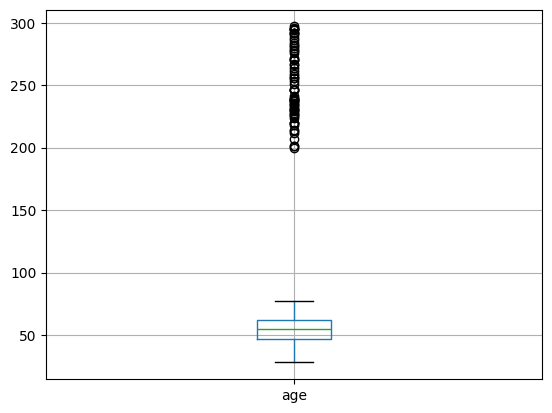

In [2252]:
df[['age']].boxplot()
plt.show()

In [2253]:
df = df[df['age']<100]
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0.0
1,2.0,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2.0
2,3.0,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1.0
3,4.0,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0.0
4,5.0,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912.0,62,1,3,0,160.0,254.0,1,2,108.0,1,3.0,4.0
914,915.0,46,1,3,0,134.0,310.0,0,1,126.0,0,0.0,2.0
915,916.0,54,0,3,0,127.0,333.0,1,2,154.0,0,0.0,1.0
917,918.0,55,1,3,0,122.0,223.0,1,2,100.0,0,0.0,2.0


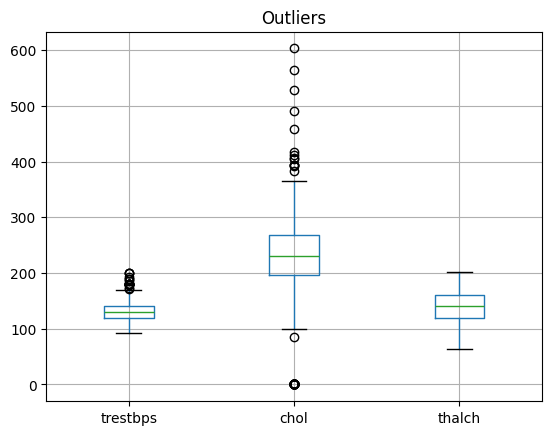

In [2254]:
column = df[["trestbps","chol","thalch"]]

column.boxplot()
plt.title("Outliers")
plt.show()

In [2255]:
df = df[(df['chol']>100) & (df['chol']<350)]
df = df[(df['trestbps']>100) & (df['trestbps']<150)]


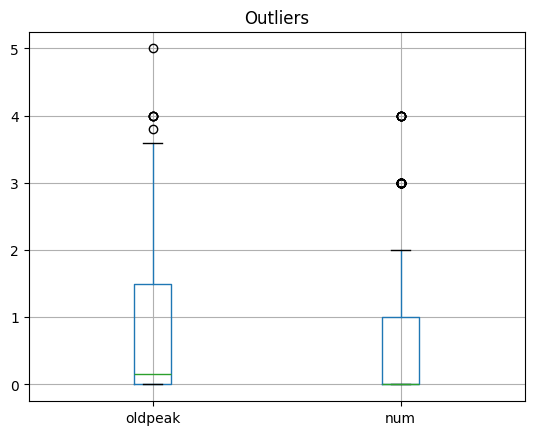

In [2256]:
column = df[["oldpeak","num"]]

column.boxplot()
plt.title("Outliers")
plt.show()

In [2257]:
df = df[(df['oldpeak']<3.5)]
df = df[(df['num']<3)]

# Data visualization

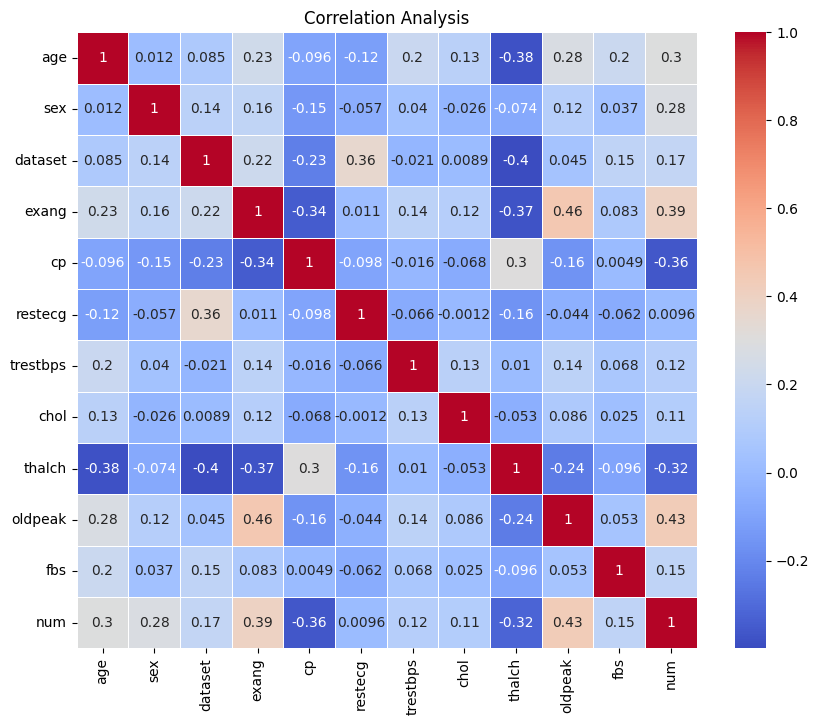

In [2258]:
column = ["age",'sex',"dataset","exang",'cp','restecg',"trestbps","chol","thalch","oldpeak","fbs","num"]
corr = df[column].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

# Fitting models

In [2259]:
X = df.drop(columns=["id","num"])
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [2260]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [2261]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2262]:
rf = RandomForestClassifier(random_state=42)

gb = GradientBoostingClassifier(max_depth=10,
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=42)

dt = DecisionTreeClassifier(max_depth=100,min_samples_leaf=0.06, random_state=42)

kn = KNeighborsClassifier(n_neighbors=100)

log = LogisticRegression(random_state=42)

bc = BaggingClassifier(estimator=kn,oob_score=True, n_estimators=200, random_state=1)

In [2263]:
models = [('Logistic Regressor', log), ('KNeighbors Classifier', kn),('Random Forest Classifier', rf),('Decision Tree Classifier', dt), ('Gradient Boosting Classifier', gb), ('Bagging Classifier', bc)]

accuracy = {}

for name,model in models:
    accuracy[name] = evaluate_model(model, X_train, X_test, y_train, y_test)


accuracy

{'Logistic Regressor': 0.7638888888888888,
 'KNeighbors Classifier': 0.5972222222222222,
 'Random Forest Classifier': 0.7222222222222222,
 'Decision Tree Classifier': 0.7083333333333334,
 'Gradient Boosting Classifier': 0.6666666666666666,
 'Bagging Classifier': 0.5972222222222222}

In [2264]:
ada = AdaBoostClassifier(estimator=log, n_estimators=500, random_state=1) 

evaluate_model(ada, X_train, X_test, y_train, y_test)

/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7638888888888888

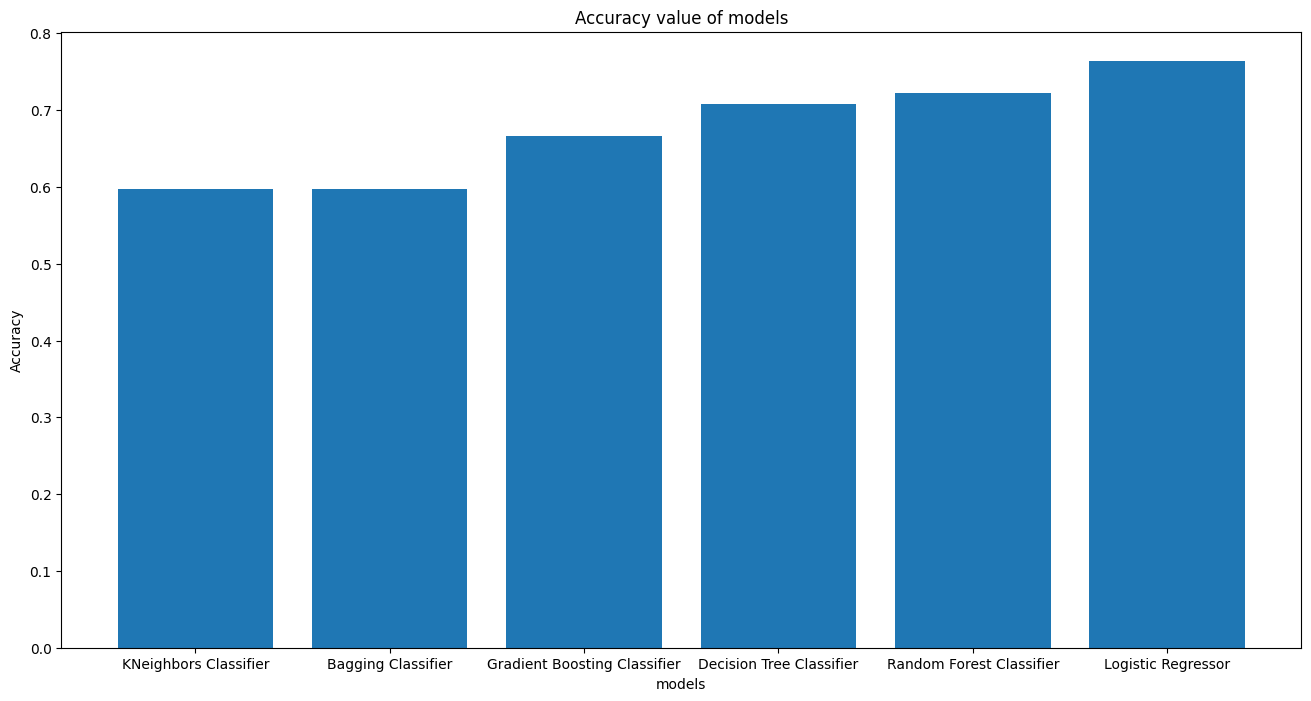

In [2265]:
data = dict(sorted(accuracy.items(), key=lambda key_val: key_val[1]))

names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(16, 8))
plt.title('Accuracy value of models')
plt.xlabel("models")
plt.ylabel('Accuracy')
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

### The best model is Logistic Regressor with accuracy = 76%